In [1]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange

C:\Users\singh\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
import PyPDF2
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams
from collections import Counter
import re
import math
import nltk
from nltk.corpus import wordnet as wn
from nltk import pos_tag

In [4]:
def load_and_return_pdf_book(path):
    pdfFileObj = open(path, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    text = ""
    for i in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(i)
        text += pageObj.extractText()
    return text

In [ ]:
da_vinci_code = load_and_return_pdf_book('TheDaVinciCode.pdf')
da_vinci_code

In [6]:
da_list=da_vinci_code.split("CHAPTER ")


In [7]:
digital_fortess = load_and_return_pdf_book('Dan Brown - Digital Fortress-Corgi Books (2004).pdf')

In [8]:
dan = da_vinci_code.split("second of his life. ")

In [9]:
da_vinci_code=dan[1]

In [ ]:
da_vinci_code

In [11]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [12]:
analyzer = SentimentIntensityAnalyzer()

In [44]:
# sentence_list = tokenize.sent_tokenize(da_vinci_code)
sentiments = {'compound':[], 'neg':[], 'neu':[], 'pos':[]}

for chapter in da_list:
    vs = analyzer.polarity_scores(chapter)
    sentiments['compound'].append(vs['compound'])
    sentiments['neg'].append( vs['neg'])
    sentiments['neu'].append(vs['neu'])
    sentiments['pos'].append(vs['pos'])

# sentiments['compound'] = sentiments['compound'] / len(sentence_list)
# sentiments['neg'] = sentiments['neg'] / len(sentence_list)
# sentiments['neu'] = sentiments['neu'] / len(sentence_list)
# sentiments['pos'] = sentiments['pos'] / len(sentence_list)


In [ ]:
sentiments

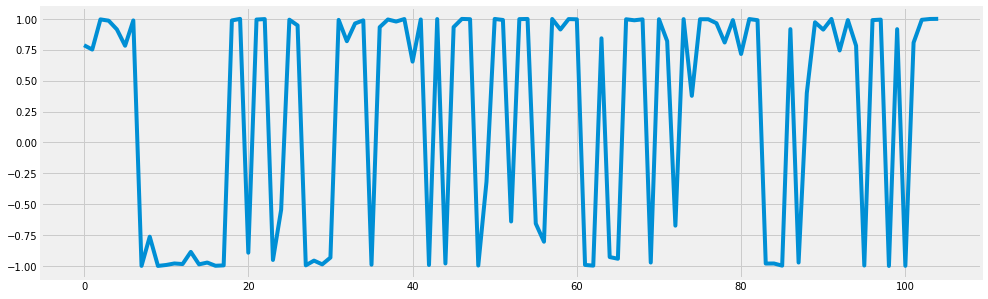

In [54]:
%matplotlib inline
plt.figure(figsize=(15, 5))
x=np.arange(0,len(da_list),1)
plt.plot(x,sentiments["compound"])

In [ ]:
x = np.arange(0,len(da_list),1)

plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiments):
    plt.plot(x,
             sentiment,
             label=['compound', 'neg', 'neu', 'pos'][i])
# plt.plot(movingaverage(compound_sentiments, 10)+.1, color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('sentimental analysis', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

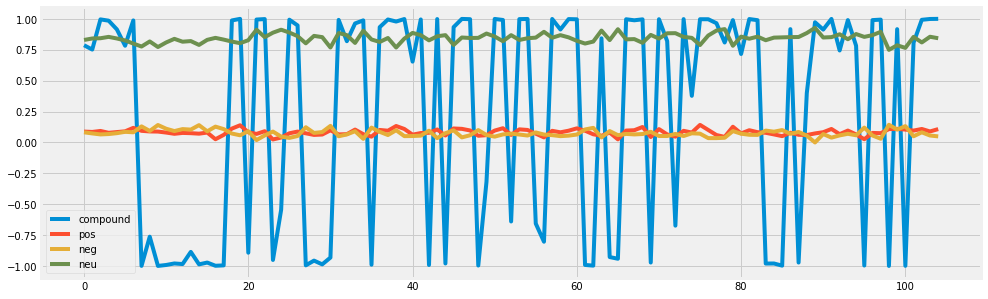

In [58]:
%matplotlib inline
plt.figure(figsize=(15, 5))
x=np.arange(0,len(da_list),1)
plt.plot(x,sentiments["compound"],label="compound")
plt.plot(x,sentiments["pos"],label="pos")
plt.plot(x,sentiments["neg"],label="neg")
plt.plot(x,sentiments["neu"],label="neu")
plt.legend()

In [62]:
chapter_sentiments = {'compound':[], 'neg':[], 'neu':[], 'pos':[]}
for chapter in da_list:
    sentence_list = tokenize.sent_tokenize(chapter)
    sentiments = {'compound':[], 'neg':[], 'neu':[], 'pos':[]}

    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'].append(vs['compound'])
        sentiments['neg'].append( vs['neg'])
        sentiments['neu'].append(vs['neu'])
        sentiments['pos'].append(vs['pos'])
    chapter_sentiments['compound'].append(sum(sentiments['compound'])/len(sentiments['compound']))
    chapter_sentiments['neg'].append(sum(sentiments['neg'])/len(sentiments['neg']))
    chapter_sentiments['neu'].append(sum(sentiments['neu'])/len(sentiments['neu']))
    chapter_sentiments['pos'].append(sum(sentiments['pos'])/len(sentiments['pos']))

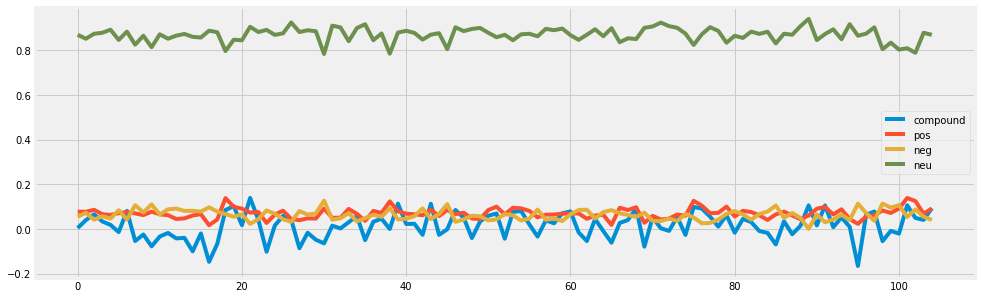

In [69]:
%matplotlib inline
plt.figure(figsize=(15, 5))
x=np.arange(0,len(da_list),1)
plt.plot(x,chapter_sentiments["compound"],label="compound")
plt.plot(x,chapter_sentiments["pos"],label="pos")
plt.plot(x,chapter_sentiments["neg"],label="neg")
plt.plot(x,chapter_sentiments["neu"],label="neu")
plt.legend()

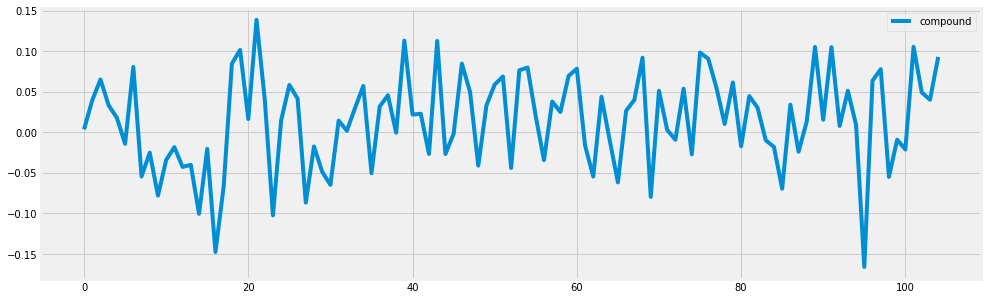

In [70]:
%matplotlib inline
plt.figure(figsize=(15, 5))
x=np.arange(0,len(da_list),1)
plt.plot(x,chapter_sentiments["compound"],label="compound")
plt.legend()

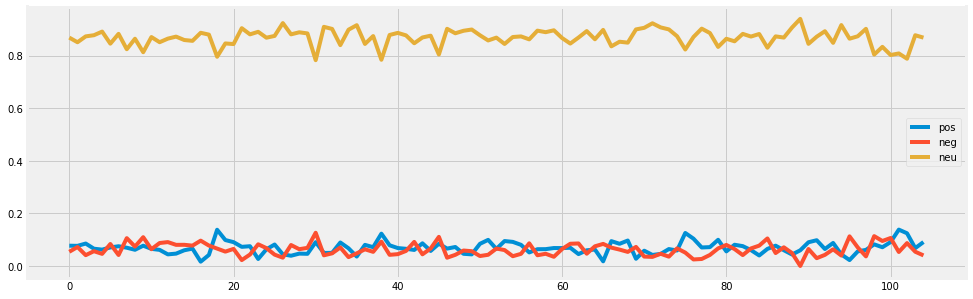

In [71]:
%matplotlib inline
plt.figure(figsize=(15, 5))
x=np.arange(0,len(da_list),1)
plt.plot(x,chapter_sentiments["pos"],label="pos")
plt.plot(x,chapter_sentiments["neg"],label="neg")
plt.plot(x,chapter_sentiments["neu"],label="neu")
plt.legend()

In [85]:
# hp = [da_list]

In [100]:
data = {'book': [], 'chapter_number': [], 'text': []}

# for book in hp:
#     print(book)
for i, chapter in tqdm(enumerate(da_list)):
    title = str(i)
#         print('   ', chapter, title)
    text = chapter.replace('\n', '')
    data['book'].append('Da Vince Code')
    data['chapter_number'].append(title)
    data['text'].append(text)
#     print()

hp_df = pd.DataFrame(data=data)

In [90]:
hp_df

book chapter_number  \
0    Da Vince Code              0   
1    Da Vince Code              1   
2    Da Vince Code              2   
3    Da Vince Code              3   
4    Da Vince Code              4   
5    Da Vince Code              5   
6    Da Vince Code              6   
7    Da Vince Code              7   
8    Da Vince Code              8   
9    Da Vince Code              9   
10   Da Vince Code             10   
11   Da Vince Code             11   
12   Da Vince Code             12   
13   Da Vince Code             13   
14   Da Vince Code             14   
15   Da Vince Code             15   
16   Da Vince Code             16   
17   Da Vince Code             17   
18   Da Vince Code             18   
19   Da Vince Code             19   
20   Da Vince Code             20   
21   Da Vince Code             21   
22   Da Vince Code             22   
23   Da Vince Code             23   
24   Da Vince Code             24   
25   Da Vince Code             25   
26   Da Vince Code             26   
27   Da Vince Code             27   
28   Da Vince Code             28   
29   Da Vince Code             29   
30   Da Vince Code             30   
31   Da Vince Code             31   
32   Da Vince Code             32   
33   Da Vince Code             33   
34   Da Vince Code             34   
35   Da Vince Code             35   
36   Da Vince Code             36   
37   Da Vince Code             37   
38   Da Vince Code             38   
39   Da Vince Code             39   
40   Da Vince Code             40   
41   Da Vince Code             41   
42   Da Vince Code             42   
43   Da Vince Code             43   
44   Da Vince Code             44   
45   Da Vince Code             45   
46   Da Vince Code             46   
47   Da Vince Code             47   
48   Da Vince Code             48   
49   Da Vince Code             49   
50   Da Vince Code             50   
51   Da Vince Code             51   
52   Da Vince Code             52   
53   Da Vince Code             53   
54   Da Vince Code             54   
55   Da Vince Code             55   
56   Da Vince Code             56   
57   Da Vince Code             57   
58   Da Vince Code             58   
59   Da Vince Code             59   
60   Da Vince Code             60   
61   Da Vince Code             61   
62   Da Vince Code             62   
63   Da Vince Code             63   
64   Da Vince Code             64   
65   Da Vince Code             65   
66   Da Vince Code             66   
67   Da Vince Code             67   
68   Da Vince Code             68   
69   Da Vince Code             69   
70   Da Vince Code             70   
71   Da Vince Code             71   
72   Da Vince Code             72   
73   Da Vince Code             73   
74   Da Vince Code             74   
75   Da Vince Code             75   
76   Da Vince Code             76   
77   Da Vince Code             77   
78   Da Vince Code             78   
79   Da Vince Code             79   
80   Da Vince Code             80   
81   Da Vince Code             81   
82   Da Vince Code             82   
83   Da Vince Code             83   
84   Da Vince Code             84   
85   Da Vince Code             85   
86   Da Vince Code             86   
87   Da Vince Code             87   
88   Da Vince Code             88   
89   Da Vince Code             89   
90   Da Vince Code             90   
91   Da Vince Code             91   
92   Da Vince Code             92   
93   Da Vince Code             93   
94   Da Vince Code             94   
95   Da Vince Code             95   
96   Da Vince Code             96   
97   Da Vince Code             97   
98   Da Vince Code             98   
99   Da Vince Code             99   
100  Da Vince Code            100   
101  Da Vince Code            101   
102  Da Vince Code            102   
103  Da Vince Code            103   
104  Da Vince Code            104   

                                                  text  
0    1Robert Langdon awoke slowly.

In [91]:
def text_emotion(df, column):
    new_df = df.copy()

    filepath = ('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

    
    book = ''
    chapter = ''
    
    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            if row['book'] != book:
                print(row['book'])
                book = row['book']
            if row['chapter_number'] != chapter:
                print('   ', row['chapter_number'])
                chapter = row['chapter_number']
                chap = row['chapter_number']
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [92]:
emo_hp_df = text_emotion(hp_df, 'text')

Da Vince Code
    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
    10
    11
    12
    13
    14
    15
    16
    17
    18
    19
    20
    21
    22
    23
    24
    25
    26
    27
    28
    29
    30
    31
    32
    33
    34
    35
    36
    37
    38
    39
    40
    41
    42
    43
    44
    45
    46
    47
    48
    49
    50
    51
    52
    53
    54
    55
    56
    57
    58
    59
    60
    61
    62
    63
    64
    65
    66
    67
    68
    69
    70
    71
    72
    73
    74
    75
    76
    77
    78
    79
    80
    81
    82
    83
    84
    85
    86
    87
    88
    89
    90
    91
    92
    93
    94
    95
    96
    97
    98
    99
    100
    101
    102
    103
    104



In [95]:
emo_hp_df.head()

book chapter_number  \
0  Da Vince Code              0   
1  Da Vince Code              1   
2  Da Vince Code              2   
3  Da Vince Code              3   
4  Da Vince Code              4   

                                                text  anger  anticipation  \
0  1Robert Langdon awoke slowly.A telephone was r...     16            27   
1  2One mile away, the hulking albino named Silas...     18            20   
2  3The crisp April air whipped through the open ...     17            38   
3  4Captain Bezu Fache carried himself like an an...     21            42   
4  5Murray Hill PlaceŠthe new Opus Dei World Head...     18            51   

   disgust  fear  joy  negative  positive  sadness  surprise  trust  
0        9    21   18        46        47       28        19     33  
1       12    20   17        38        53       18         8     50  
2        9    19   30        42        86       34        22     33  
3       10    27   21        64        97       35        17     47  
4        9    39   36        42        66       16         9     42

In [96]:
emo_hp_df['word_count'] = emo_hp_df['text'].apply(tokenize.word_tokenize).apply(len)

In [97]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

In [101]:
for emotion in emotions:
    emo_hp_df[emotion] = emo_hp_df[emotion] / emo_hp_df['word_count']

In [102]:
emo_hp_df.set_index(['book', 'chapter_number'], inplace=True)

In [103]:
emo_hp_df.head()

text  \
book          chapter_number                                                      
Da Vince Code 0               1Robert Langdon awoke slowly.A telephone was r...   
              1               2One mile away, the hulking albino named Silas...   
              2               3The crisp April air whipped through the open ...   
              3               4Captain Bezu Fache carried himself like an an...   
              4               5Murray Hill PlaceŠthe new Opus Dei World Head...   

                                 anger  anticipation   disgust      fear  \
book          chapter_number                                               
Da Vince Code 0               0.009106      0.015367  0.005122  0.011952   
              1               0.016791      0.018657  0.011194  0.018657   
              2               0.007773      0.017375  0.004115  0.008688   
              3               0.007460      0.014920  0.003552  0.009591   
              4               0.010817      0.030649  0.005409  0.023438   

                                   joy  negative  positive   sadness  \
book          chapter_number                                           
Da Vince Code 0               0.010245  0.026181  0.026750  0.015936   
              1               0.015858  0.035448  0.049440  0.016791   
              2               0.013717  0.019204  0.039323  0.015546   
              3               0.007460  0.022735  0.034458  0.012433   
              4               0.021635  0.025240  0.039663  0.009615   

                              surprise     trust  word_count  
book          chapter_number                                  
Da Vince Code 0               0.010814  0.018782        1757  
              1               0.007463  0.046642        1072  
              2               0.010059  0.015089        2187  
              3               0.006039  0.016696        2815  
              4               0.005409  0.025240        1664

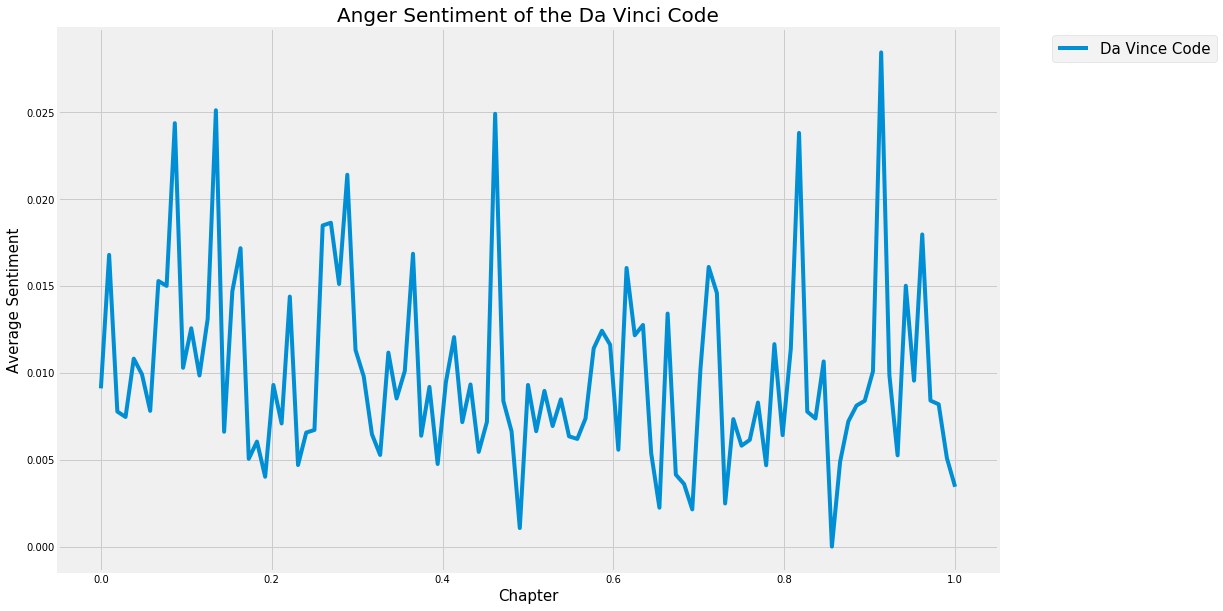

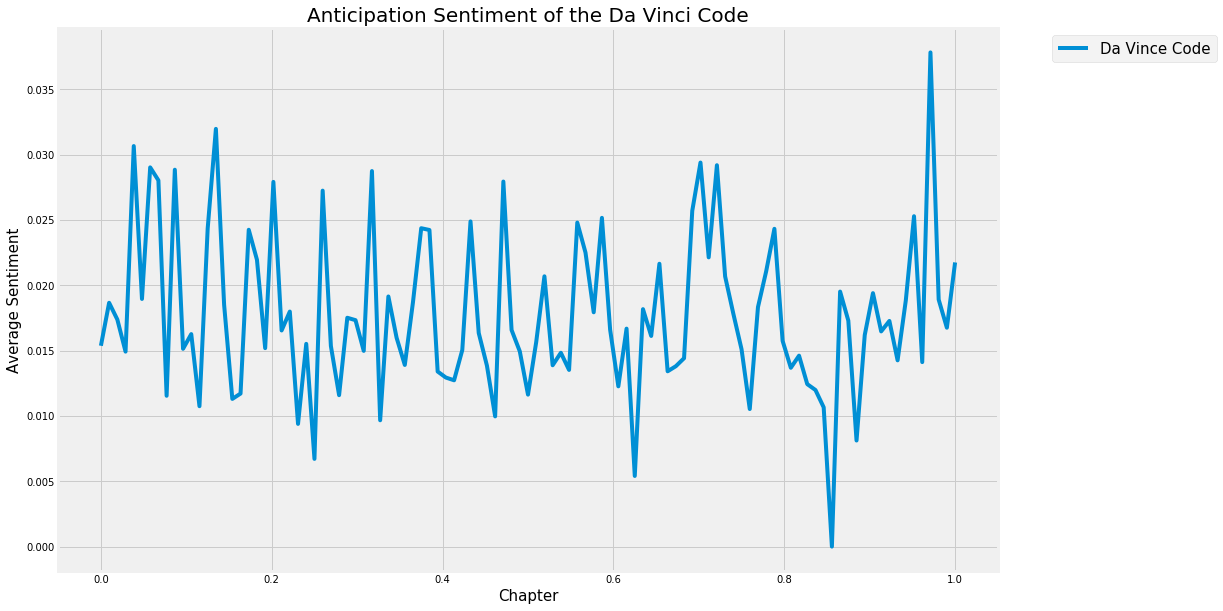

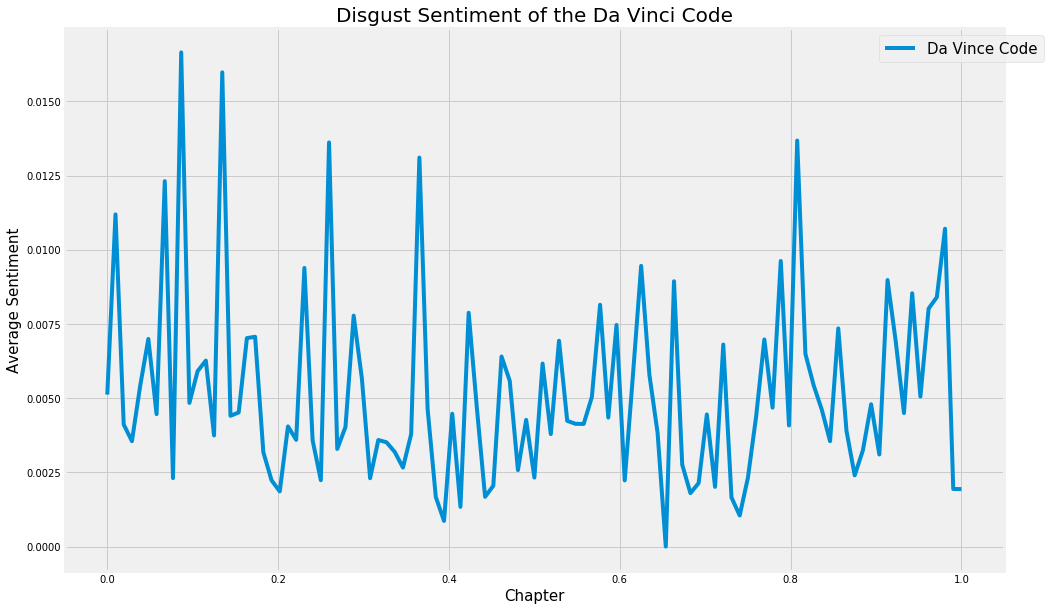

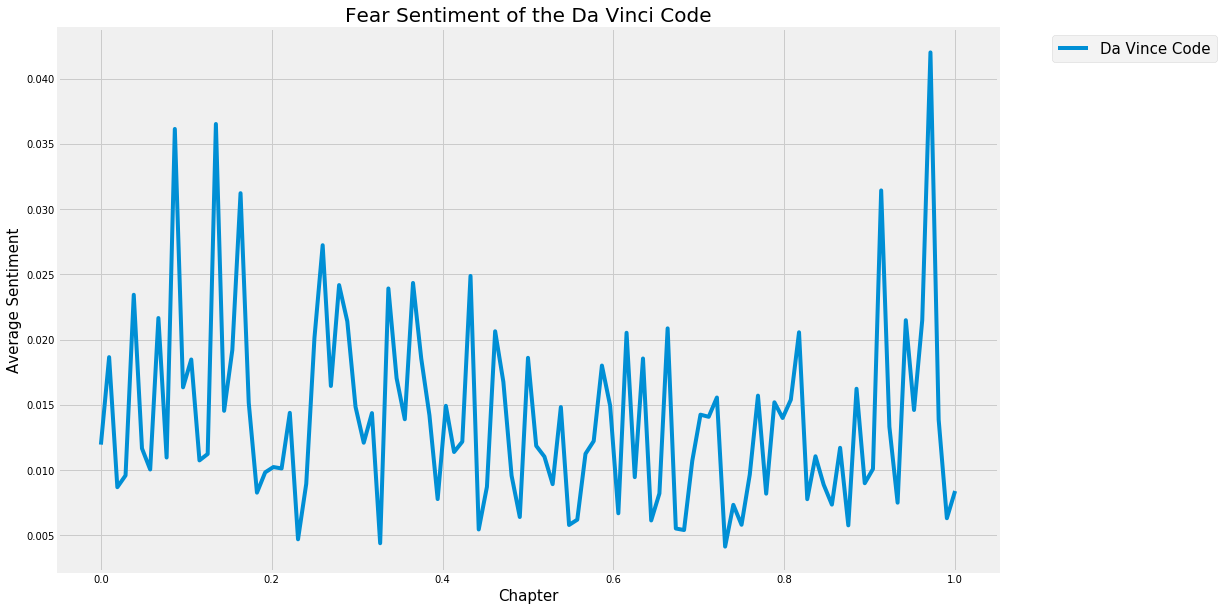

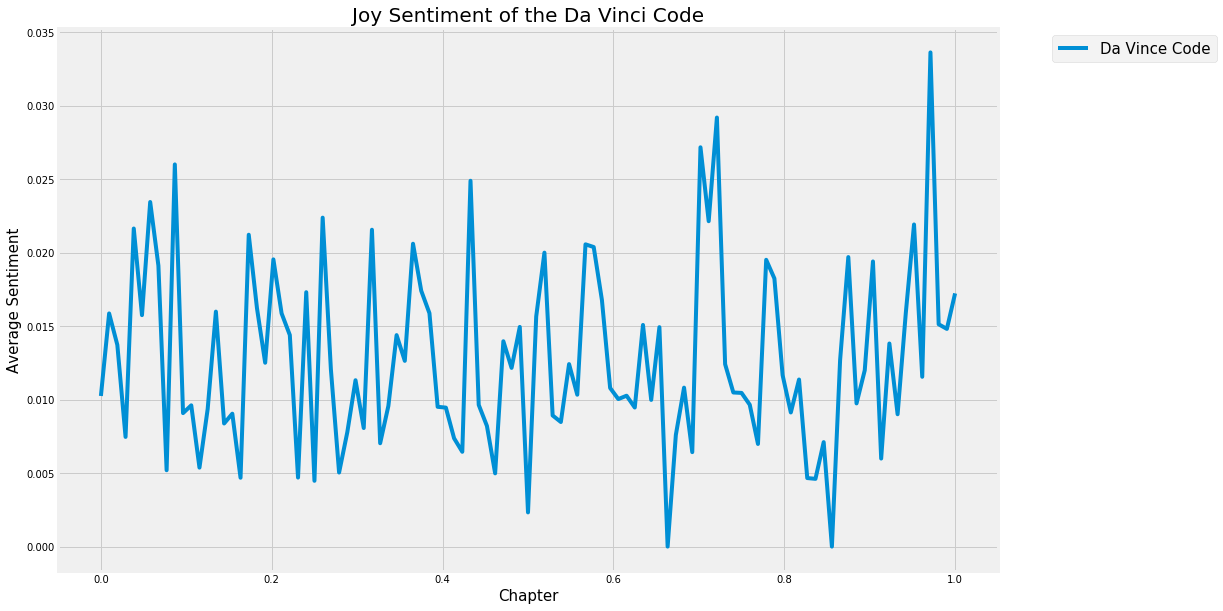

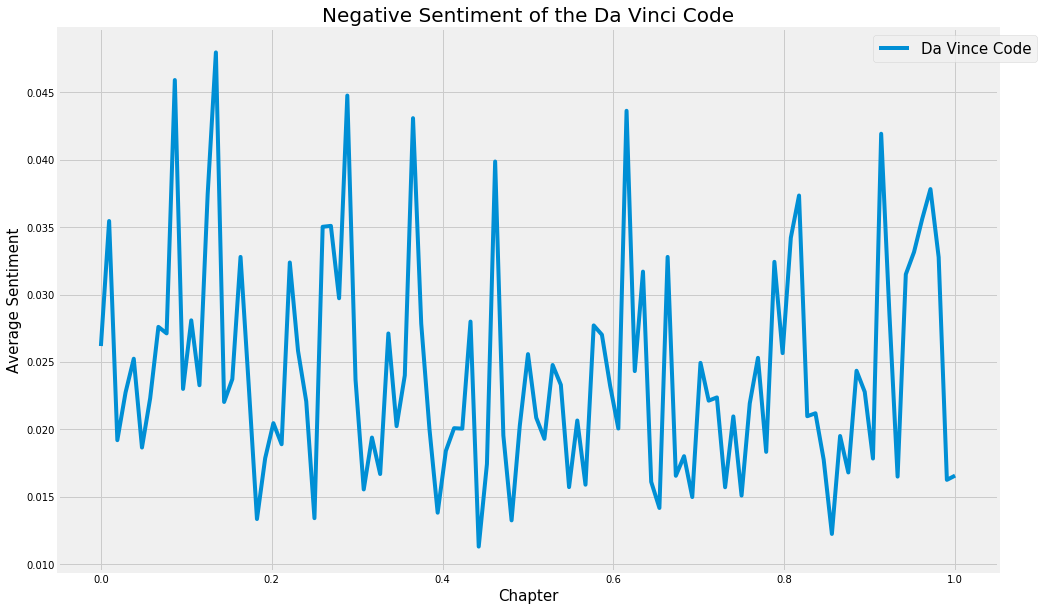

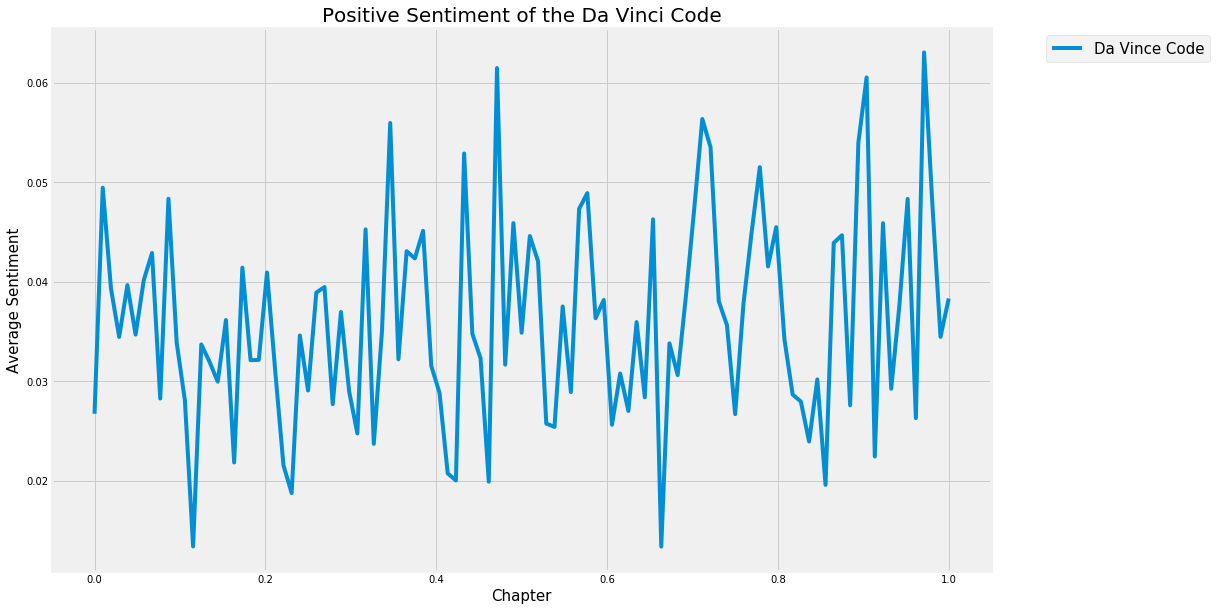

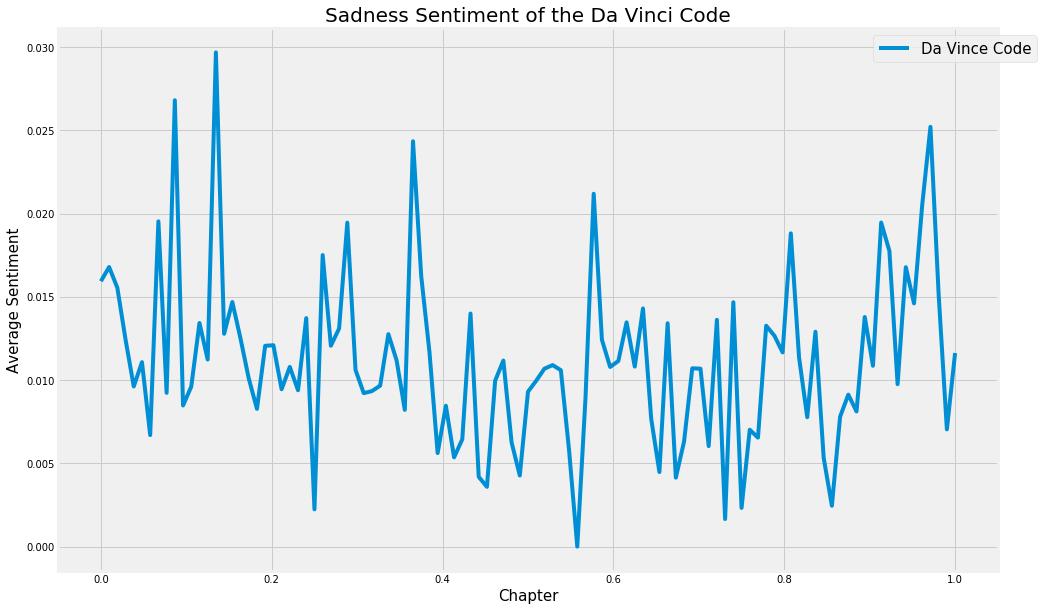

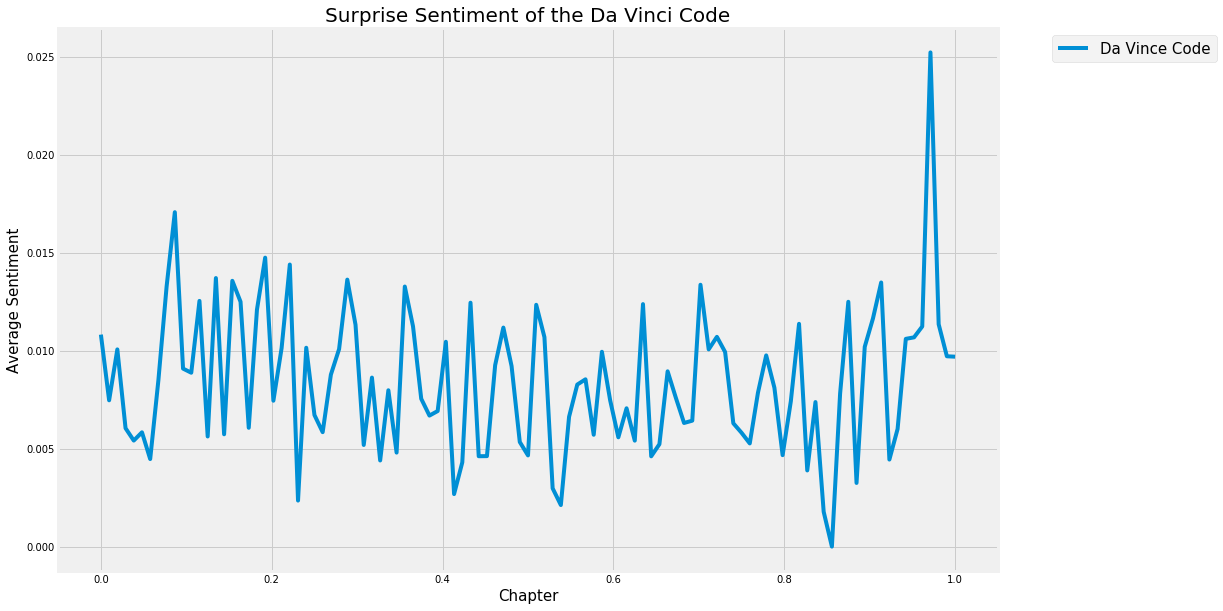

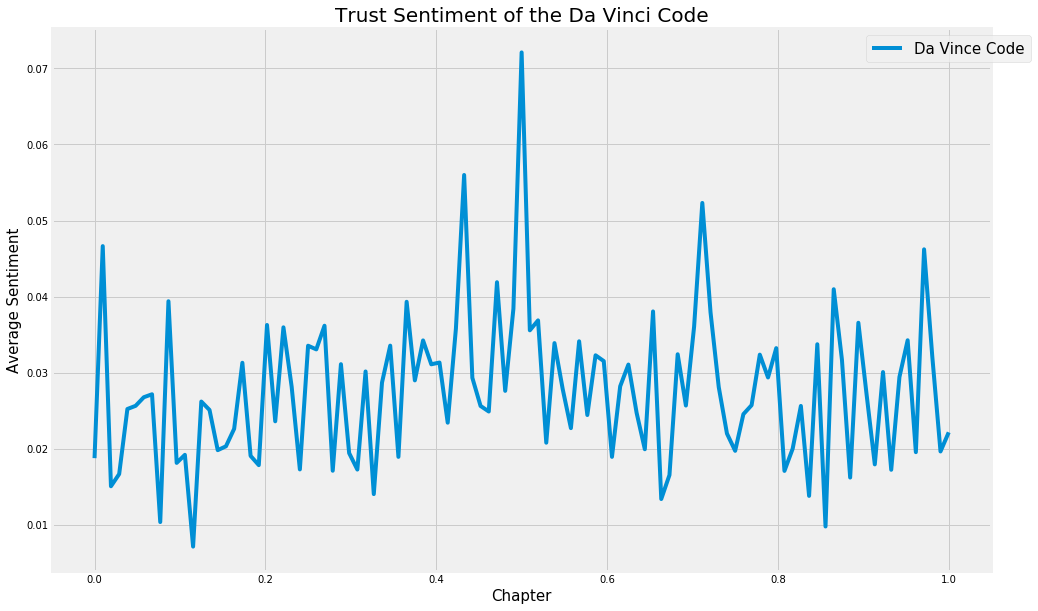

In [127]:
x = np.linspace(0, 1, num=len(da_list))
for emotion in emotions:
    y = [emo_hp_df.loc['Da Vince Code'].loc[chapter][emotion] for chapter in hp_df['chapter_number']]

    plt.figure(figsize=(15, 10))
#     for book in book_indices:
    plt.plot(x, y, label='Da Vince Code')
#     plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label='Moving Average')
    plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
    plt.title('{} Sentiment of the Da Vinci Code'.format(emotion.title()), fontsize=20)
    plt.xlabel('Chapter', fontsize=15)
    plt.ylabel('Average Sentiment', fontsize=15)
    plt.show()

In [13]:
digital_fortess = digital_fortess.replace('Chapter 112', 'CHAPTER 112')

In [14]:
digital_fortess_list = digital_fortess.split('CHAPTER ')

In [15]:
digital_fortess_list.pop(0)

"DIGITAL FORTRESS Dan Brown  For my parents... my mentors and heroes  A debt of gratitude: to my editors at St. Martin's Press, Thomas Dunne and the exceptionally talented Melissa Jacobs. To my agents in New York, George Wieser, Olga Wieser, and Jake Elwell. To all those who read and contributed to the manuscript along the way. And especially to my wife, Blythe, for her enthusiasm and patience. Also... a quiet thank you to the two faceless ex-NSA cryptographers who made invaluable contributions via anonymous remailers. Without them this book would not have been written.   PROLOGUE  PLAZA DE ESPAÑA SEVILLE, SPAIN 11:00 A.M. It is said that in death, all things become clear; Ensei Tankado now knew it was true. As he clutched his chest and fell to the ground in pain, he realized the horror of his mistake. People appeared, hovering over him, trying to help. But Tankado did not want help--it was too late for that. Trembling, he raised his left hand and held his fingers outward. Look at my h

In [16]:
# for text in digital_fortess_list:
#     print(text[:3])
len(digital_fortess_list)

128

In [29]:
lost_symbol

NameError: name 'lost_symbol' is not defined

In [157]:
lost_symbol_list = lost_symbol.split('CHAPTER ')

In [ ]:
lost_symbol_list.pop(0)

In [18]:
def return_book_dict(book_list):
    book_dict = {}
    for i, chapter in enumerate(book_list):
        book_dict['Chapter {}'.format(i+1)] = chapter
    return book_dict

In [19]:
da_dict = return_book_dict(da_list)

In [20]:
digital_fortess_dict = return_book_dict(digital_fortess_list)

## Loading the books for Sentiment Analysis

In [22]:
db = {'Da Vinci Code': da_dict,
     'Digital Fortress': digital_fortess_dict}

In [23]:
for book in tqdm(db, desc='Progress'):
#     print(book)
    for chapter in tqdm(db[book]):
#         print('  ', hp[book][chapter][0])
        text = db[book][chapter].replace('\n', '')
        sentence_list = tokenize.sent_tokenize(text)
        sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

        for sentence in sentence_list:
            vs = analyzer.polarity_scores(sentence)
            sentiments['compound'] += vs['compound']
            sentiments['neg'] += vs['neg']
            sentiments['neu'] += vs['neu']
            sentiments['pos'] += vs['pos']

        sentiments['compound'] = sentiments['compound'] / len(sentence_list)
        sentiments['neg'] = sentiments['neg'] / len(sentence_list)
        sentiments['neu'] = sentiments['neu'] / len(sentence_list)
        sentiments['pos'] = sentiments['pos'] / len(sentence_list)

        db[book][chapter] = (chapter, db[book][chapter], sentiments)

In [24]:
compound_sentiments = [db[book][chapter][2]['compound'] for book in db for chapter in db[book]]

In [25]:
chap = 0
for book in db:
    print(book)
    book_chap = 1
    for chapter in db[book]:
        print(db[book][chapter][0])
        print('     ', compound_sentiments[chap])
        book_chap += 1
        chap += 1
    print()

Da Vinci Code
Chapter 1
      -0.0201657894736842
Chapter 2
      0.001699130434782605
Chapter 3
      0.039273239436619714
Chapter 4
      0.06496146788990827
Chapter 5
      0.0330625730994152
Chapter 6
      0.017699999999999997
Chapter 7
      -0.01395916230366491
Chapter 8
      0.08049999999999999
Chapter 9
      -0.054629787234042534
Chapter 10
      -0.02586016949152542
Chapter 11
      -0.07819032258064515
Chapter 12
      -0.03427184466019417
Chapter 13
      -0.018440206185567003
Chapter 14
      -0.04280315789473684
Chapter 15
      -0.040324999999999986
Chapter 16
      -0.10065294117647061
Chapter 17
      -0.020589041095890413
Chapter 18
      -0.1477322033898305
Chapter 19
      -0.06703837209302325
Chapter 20
      0.08439305555555555
Chapter 21
      0.10137499999999992
Chapter 22
      0.016228859060402685
Chapter 23
      0.13849473684210528
Chapter 24
      0.04089409282700423
Chapter 25
      -0.10248666666666667
Chapter 26
      0.014578571428571423
Chapter 27
  

In [26]:
book_indices = {}
idx = 0
for book in db:
    start = idx
    for chapter in db[book]:
        idx += 1
    book_indices[book] = (start, idx)

In [27]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

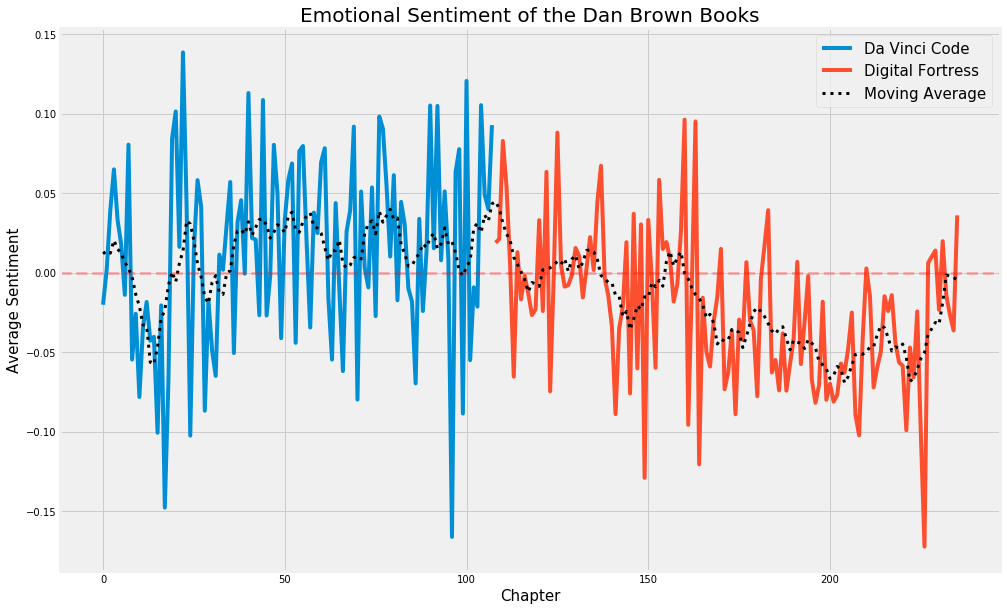

In [28]:
length = sum([len(db[book]) for book in db])
x = np.linspace(0, length - 1, num=length)
y = [db[book][chapter][2]['compound'] for book in db for chapter in db[book]]

plt.figure(figsize=(15, 10))
for book in book_indices:
    plt.plot(x[book_indices[book][0]: book_indices[book][1]],
             y[book_indices[book][0]: book_indices[book][1]],
             label=book)
plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Emotional Sentiment of the Dan Brown Books', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

In [183]:
sentiment_scores = [[db[book][chapter][2][sentiment] for book in db for chapter in db[book]]
                    for sentiment in ['compound', 'neg', 'neu', 'pos']]
compound_sentiment = sentiment_scores[0]
print('Average Book Sentiment:')
print()
for book in book_indices:
    compound = compound_sentiment[book_indices[book][0]: book_indices[book][1]]
    print('{:45}{:.2f}%'.format(book, 100 * sum(compound) / len(compound)))
print('{:45}{:.2f}%'.format('Across the entire series', 100 * sum(compound_sentiment) / len(compound_sentiment)))

Average Book Sentiment:

Da Vinci Code                                1.40%
Digital Fortress                             -2.37%
Across the entire series                     -0.67%


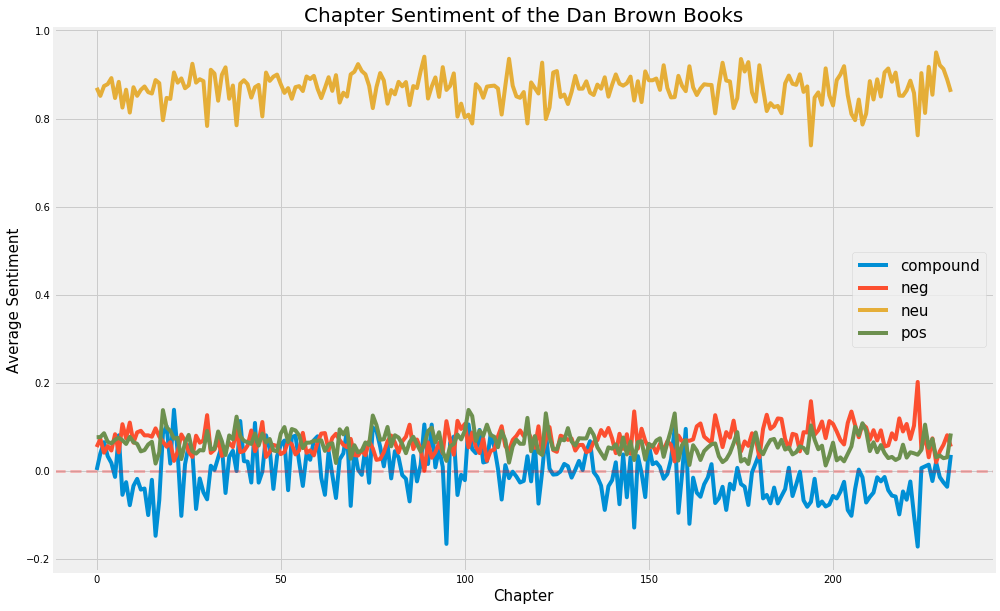

In [184]:
length = sum([len(db[book]) for book in db])
x = np.linspace(0, length - 1, num=length)

plt.figure(figsize=(15, 10))
for i, sentiment in enumerate(sentiment_scores):
    plt.plot(x,
             sentiment,
             label=['compound', 'neg', 'neu', 'pos'][i])
# plt.plot(movingaverage(compound_sentiments, 10)+.1, color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Chapter Sentiment of the Dan Brown Books', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

## Emotion Lexicon Analysis

In [189]:
data = {'book': [], 'chapter_number': [], 'text': []}

for book in db:
    print(book)
    for chapter in tqdm(db[book]):
        title = db[book][chapter][0]
#         print('   ', chapter, title)
        text = db[book][chapter][1].replace('\n', '')
        data['book'].append(book)
        data['chapter_number'].append(title)
        data['text'].append(text)
#     print()
    
db_df = pd.DataFrame(data=data)
db_df = text_emotion(db_df, 'text')

Da Vinci Code



Digital Fortress


Da Vinci Code
    Chapter 1
    Chapter 2
    Chapter 3
    Chapter 4
    Chapter 5
    Chapter 6
    Chapter 7
    Chapter 8
    Chapter 9
    Chapter 10
    Chapter 11
    Chapter 12
    Chapter 13
    Chapter 14
    Chapter 15
    Chapter 16
    Chapter 17
    Chapter 18
    Chapter 19
    Chapter 20
    Chapter 21
    Chapter 22
    Chapter 23
    Chapter 24
    Chapter 25
    Chapter 26
    Chapter 27
    Chapter 28
    Chapter 29
    Chapter 30
    Chapter 31
    Chapter 32
    Chapter 33
    Chapter 34
    Chapter 35
    Chapter 36
    Chapter 37
    Chapter 38
    Chapter 39
    Chapter 40
    Chapter 41
    Chapter 42
    Chapter 43
    Chapter 44
    Chapter 45
    Chapter 46
    Chapter 47
    Chapter 48
    Chapter 49
    Chapter 50
    Chapter 51
    Chapter 52
    Chapter 53
    Chapter 54
    Chapter 55
    Chapter 56
    Chapter 57
    Chapter 58
    Chapter 59
    Chapter 60
    Chapter 61
    Chapter 62
    Chapter 63
    Chapter 64
    Chapter 65
    Chapter 66
    C

In [193]:
db_df['word_count'] = db_df['text'].apply(tokenize.word_tokenize).apply(len)
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for emotion in emotions:
    db_df[emotion] = db_df[emotion] / db_df['word_count']
db_df.set_index(['book', 'chapter_number'], inplace=True)

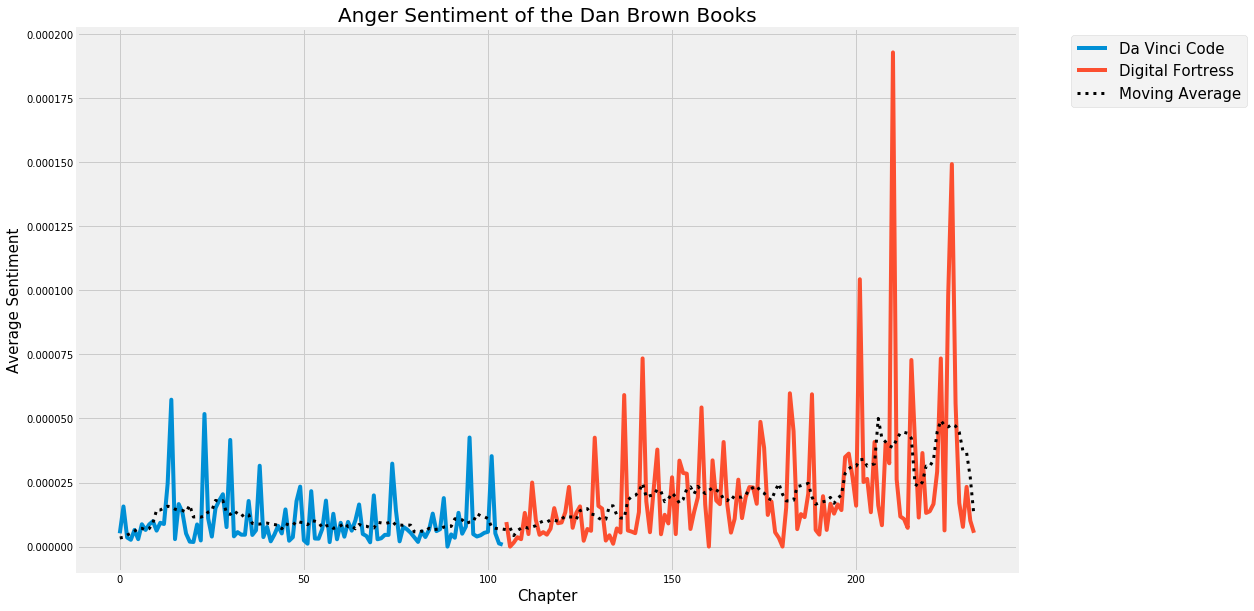

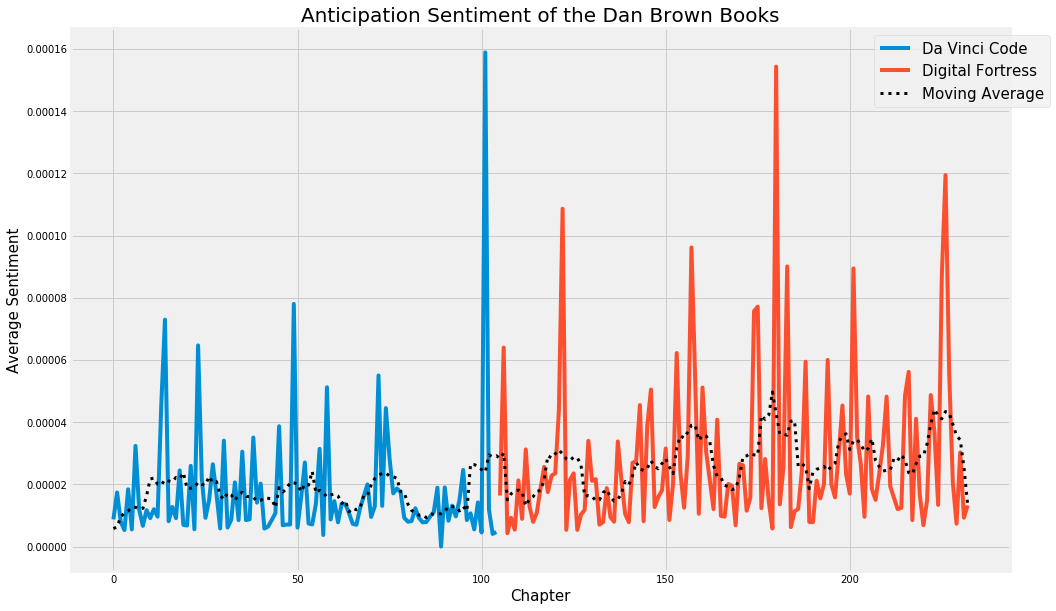

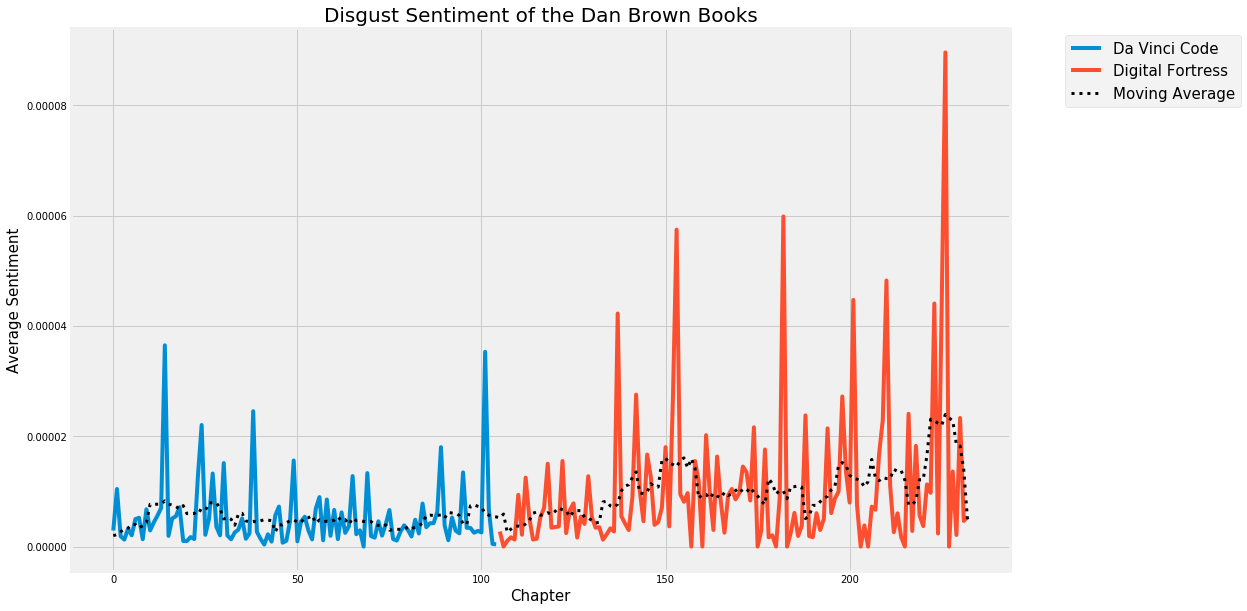

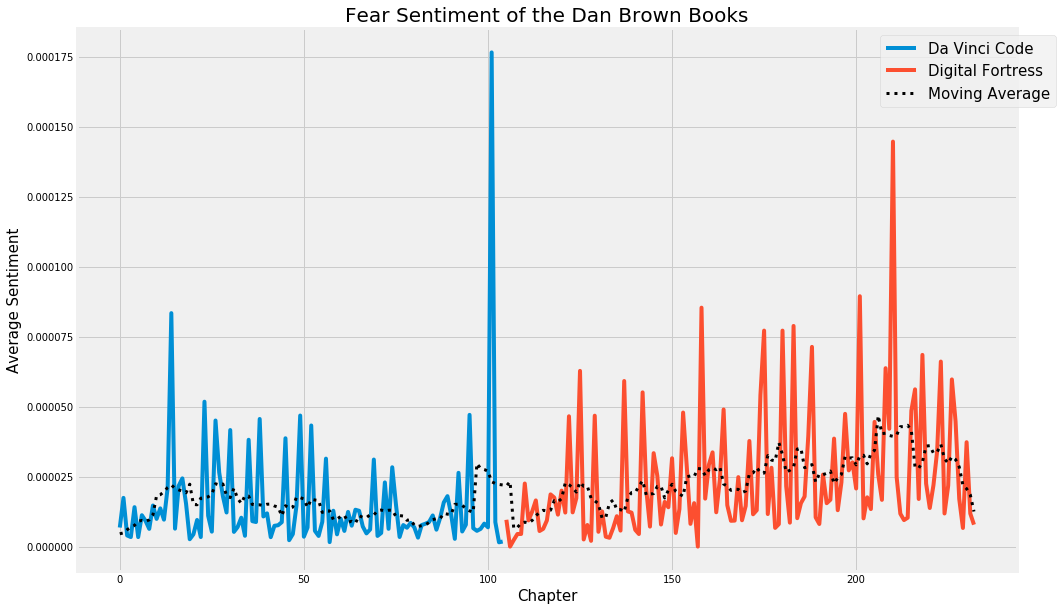

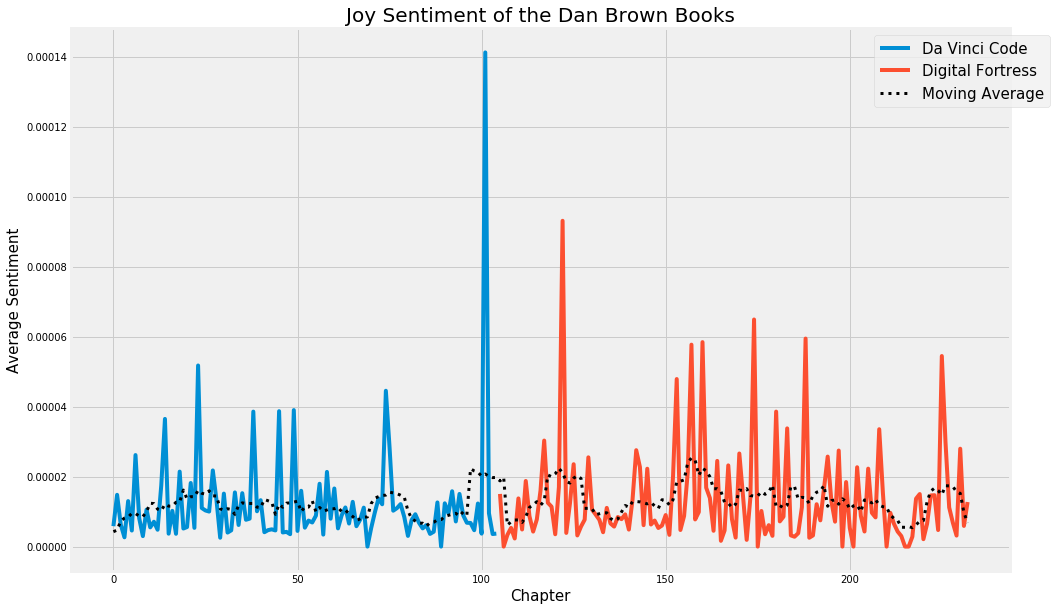

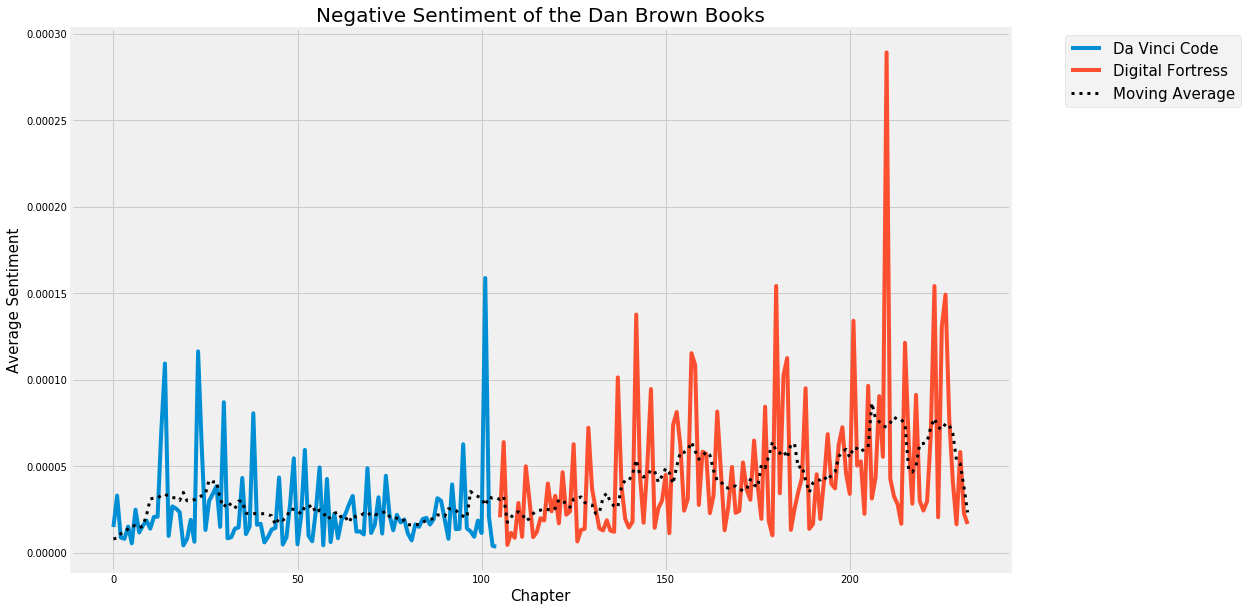

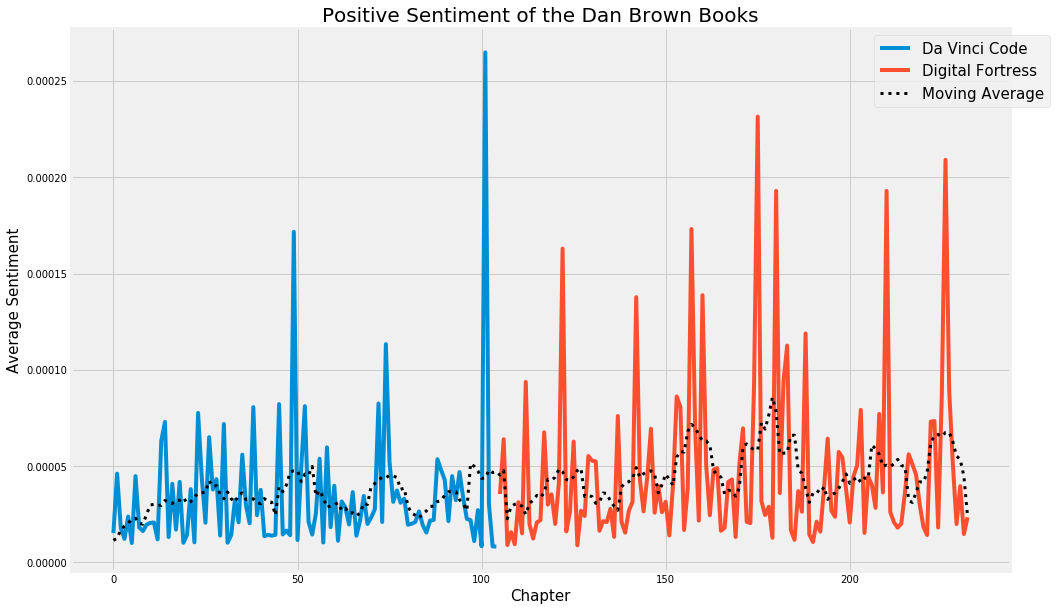

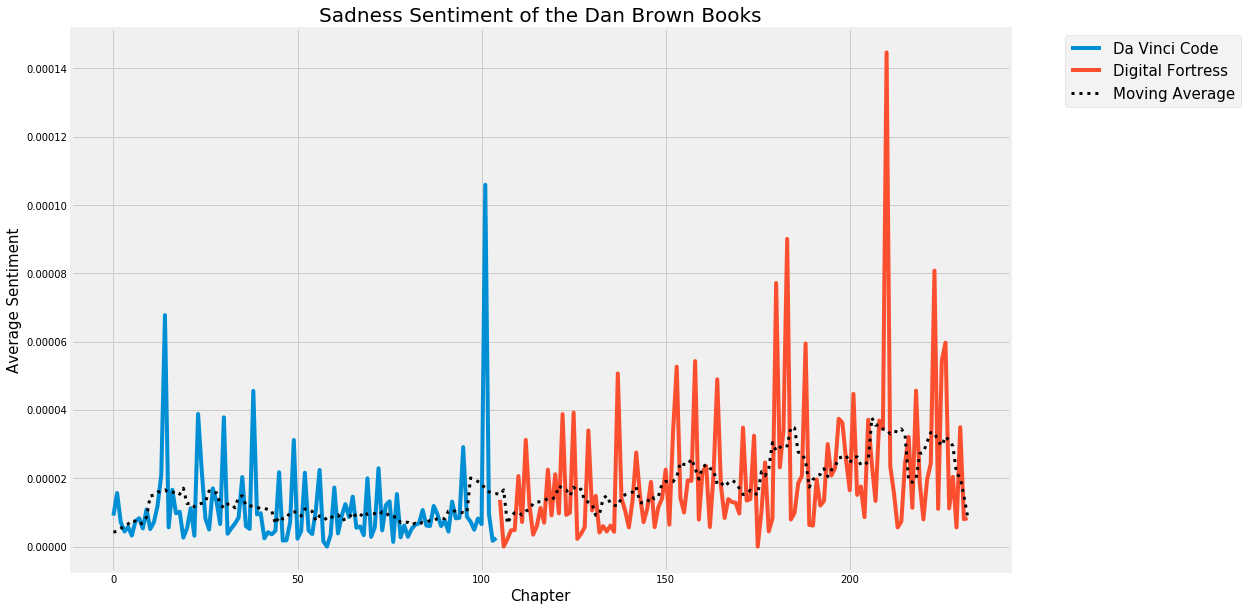

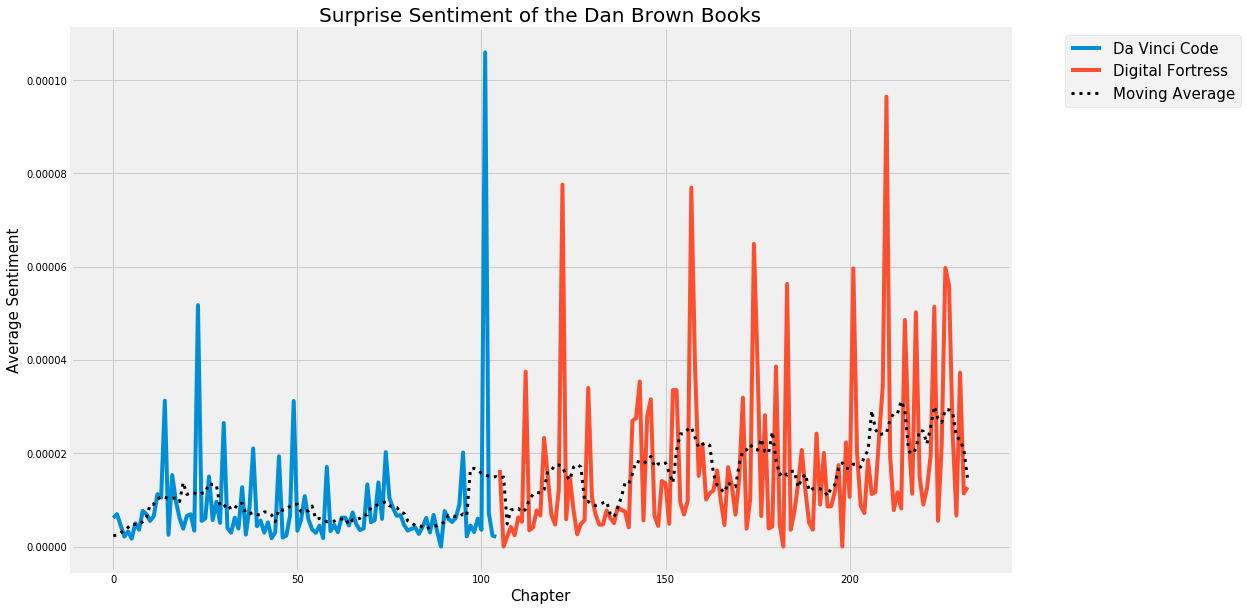

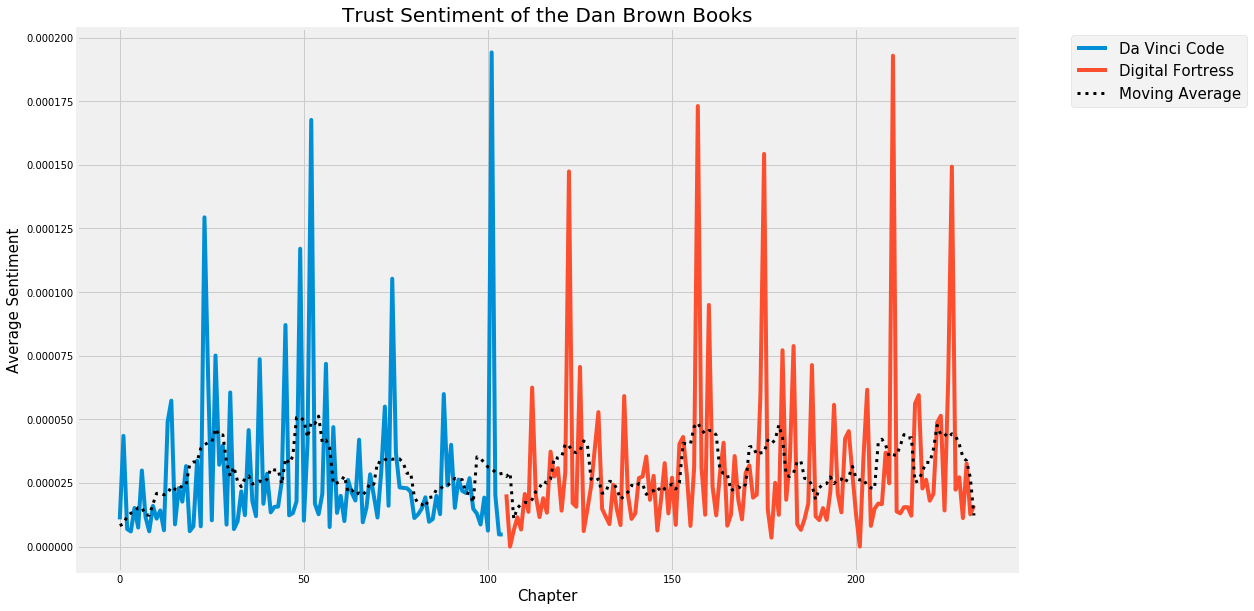

In [194]:
length = sum([len(db[book]) for book in db])
x = np.linspace(0, length - 1, num=length)

for emotion in emotions:
    y = [db_df.loc[book].loc[db[book][chapter][0]][emotion] for book in db for chapter in db[book]]

    plt.figure(figsize=(15, 10))
    for book in book_indices:
        plt.plot(x[book_indices[book][0]: book_indices[book][1]],
                 y[book_indices[book][0]: book_indices[book][1]],
                 label=book)
    plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label='Moving Average')
    plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
    plt.title('{} Sentiment of the Dan Brown Books'.format(emotion.title()), fontsize=20)
    plt.xlabel('Chapter', fontsize=15)
    plt.ylabel('Average Sentiment', fontsize=15)
    plt.show()

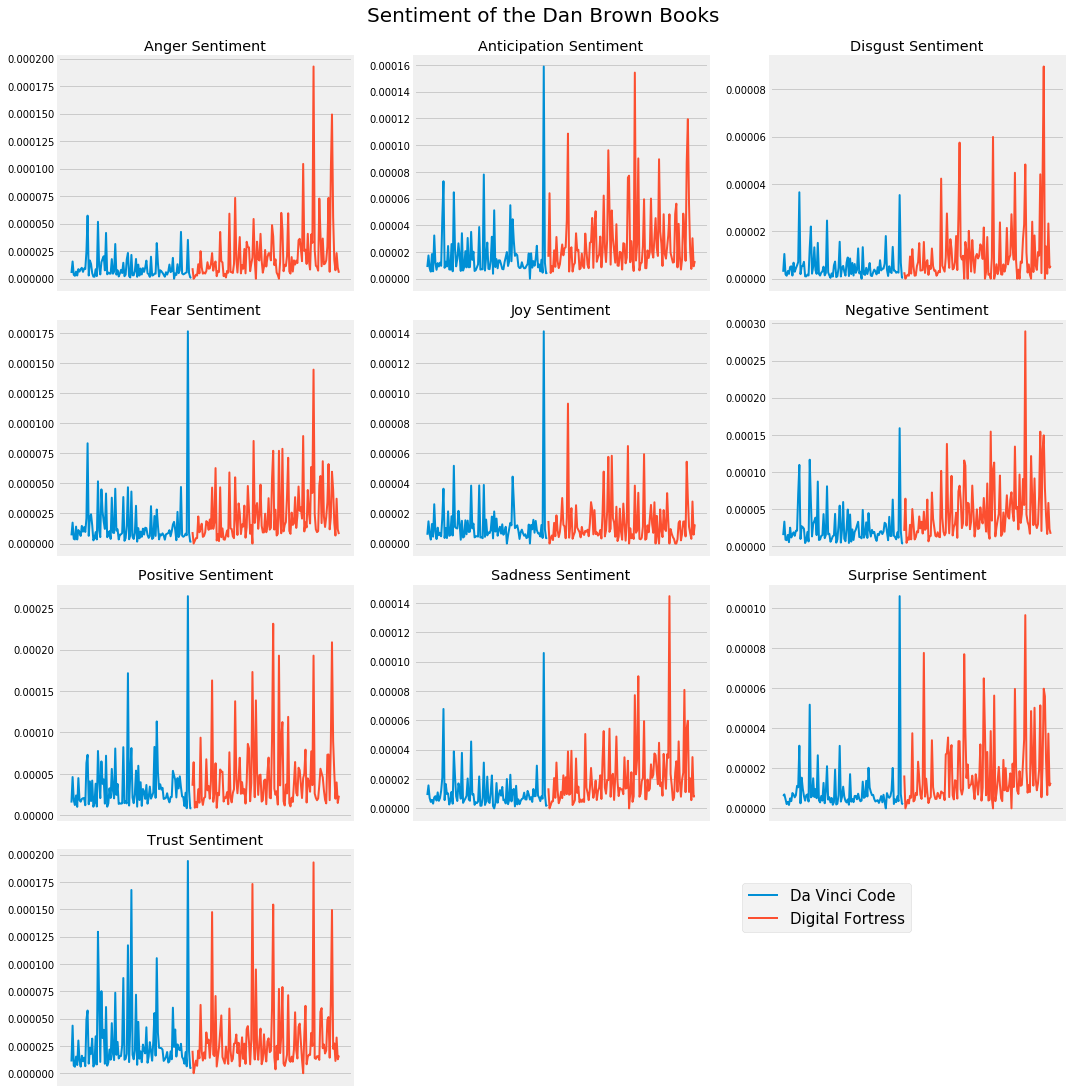

In [195]:
length = sum([len(db[book]) for book in db])
x = np.linspace(0, length - 1, num=length)

fig, ax = plt.subplots(4, 3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Sentiment of the Dan Brown Books', fontsize=20, y=1.02)
fig.subplots_adjust(top=0.88)

ax = ax.ravel()

for i, emotion in enumerate(emotions):
    y = [db_df.loc[book].loc[db[book][chapter][0]][emotion] for book in db for chapter in db[book]]
    for book in book_indices:
        ax[i].plot(x[book_indices[book][0]: book_indices[book][1]],
                 y[book_indices[book][0]: book_indices[book][1]],
                 label=book, linewidth=2)

    ax[i].set_title('{} Sentiment'.format(emotion.title()))
    ax[i].set_xticks([])

fig.legend(list(db), loc='upper right', fontsize=15, bbox_to_anchor=(.85, .2))
fig.tight_layout()
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
plt.show()

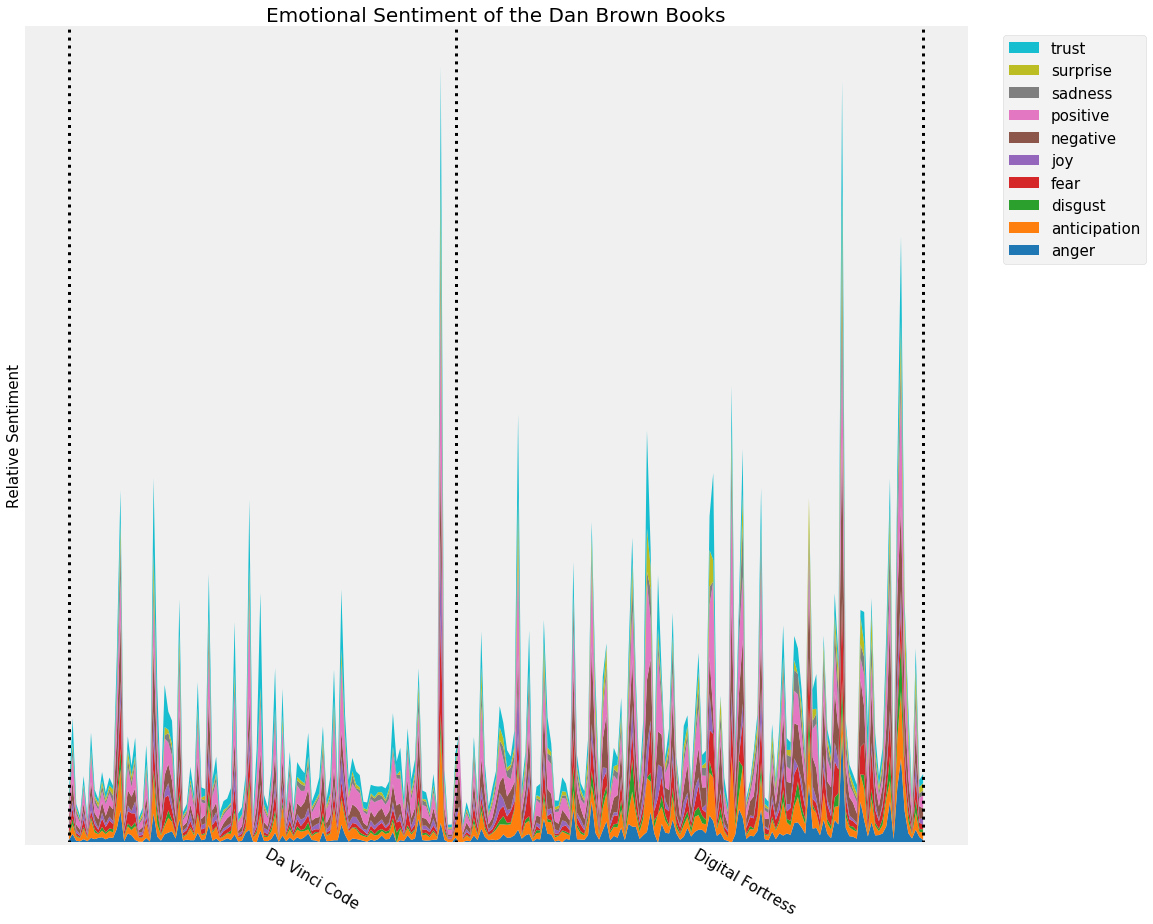

In [197]:
tab10 = matplotlib.cm.get_cmap('tab10')
length = sum([len(db[book]) for book in db])
x = np.linspace(0, length - 1, num=length)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)


y = [db_df[emotion].tolist() for emotion in emotions]
plt.stackplot(x, y, colors=(tab10(0),
                            tab10(.1),
                            tab10(.2),
                            tab10(.3),
                            tab10(.4),
                            tab10(.5),
                            tab10(.6),
                            tab10(.7),
                            tab10(.8),
                            tab10(.9)), labels=emotions)
# Plot vertical lines marking the books
for book in book_indices:
    plt.axvline(x=book_indices[book][0], color='black', linewidth=3, linestyle=':')
plt.axvline(x=book_indices[book][1]-1, color='black', linewidth=3, linestyle=':')

plt.title('Emotional Sentiment of the Dan Brown Books', fontsize=20)
plt.xticks([(book_indices[book][0] + book_indices[book][1]) / 2 for book in book_indices],
           list(db),
           rotation=-30,
           fontsize=15,
           ha='left')
plt.yticks([])
plt.ylabel('Relative Sentiment', fontsize=15)

# Reverse the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))

ax.grid(False)

plt.show()

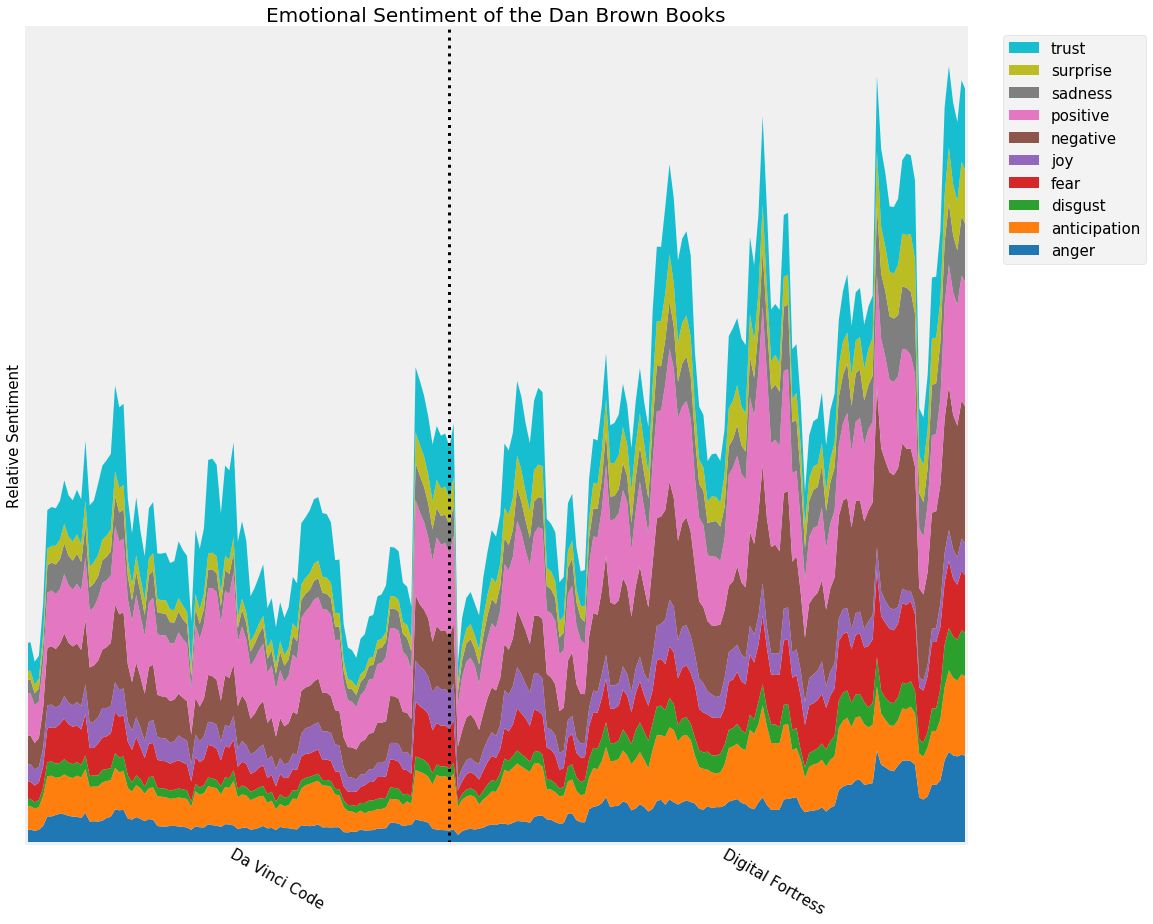

In [198]:
length = sum([len(db[book]) for book in db])
x = np.linspace(0, length - 1, num=length)
window = 10

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)


y = [movingaverage(db_df[emotion].tolist(), window) for emotion in emotions]

plt.stackplot(x, y, colors=(tab10(0),
                            tab10(.1),
                            tab10(.2),
                            tab10(.3),
                            tab10(.4),
                            tab10(.5),
                            tab10(.6),
                            tab10(.7),
                            tab10(.8),
                            tab10(.9)), labels=emotions)
# Plot vertical lines marking the books
for book in book_indices:
    plt.axvline(x=book_indices[book][0], color='black', linewidth=3, linestyle=':')
plt.axvline(x=book_indices[book][1]-1, color='black', linewidth=3, linestyle=':')

plt.title('Emotional Sentiment of the Dan Brown Books', fontsize=20)
plt.xticks([(book_indices[book][0] + book_indices[book][1]) / 2 for book in book_indices],
           list(db),
           rotation=-30,
           fontsize=15,
           ha='left')
plt.yticks([])
plt.ylabel('Relative Sentiment', fontsize=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='best', fontsize=15, bbox_to_anchor=(1.2, 1))

axes = plt.gca()
axes.set_xlim([min(x) + window / 2, max(x) - window / 2])

ax.grid(False)

plt.show()